# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

### Business Context
The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting news electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]

### Objective
The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?
2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
3. Does the converted status depend on the preferred language?
4. Is the time spent on the new page the same for the different language users?


### Data Dictionary
The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

1. user_id - Unique user ID of the person visiting the website
2. group - Whether the user belongs to the first group (control) or the second group (treatment)
3. landing_page - Whether the landing page is new or old
4. time_spent_on_the_page - Time (in minutes) spent by the user on the landing page
5. converted - Whether the user gets converted to a subscriber of the news portal or not
6. language_preferred - Language chosen by the user to view the landing page

## Import all the necessary libraries

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
from google.colab import output

!pip install pingouin

output.clear()

In [61]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest
import pingouin as pg

Later in this notebook we are going to have to run a 2 Sample T-test.  One of the assumptions of the 2 Sample T-test is that both samples have equal varriances.  The following functions allows us to test this assumptions with an F-test for Equality of Variances.

In [62]:
def f_test(x, y):
  """ F-test for Equality of Variances.  Two required inputs, x and y. Each input should be the set of data that you are testing the variance of. """
  x = np.array(x)
  y = np.array(y)

  # Calculates the F test statistic
  test_stat = np.var(x, ddof = 1)/ np.var(y, ddof = 1)

  # Defines the Degrees of Freedom
  dfx = x.size-1
  dfy = y.size-1

  # Finds the p-value
  p = stats.f.cdf(test_stat, dfx, dfy)
  if p > 0.5:
    p = 1-p

  # converts from 1 tail to 2
  p = 2*p

  return p

## Reading the Data into a DataFrame

In [63]:
df = pd.read_csv('/content/drive/MyDrive/Great Learning/Business Statistics/Project: E-news Express Project/abtest.csv')
df.user_id = df.user_id.astype(str)

## Explore the dataset and extract insights using Exploratory Data Analysis
- Data Overview
> - Viewing the first and last few rows of the dataset
> - Checking the shape of the dataset
> - Getting the statistical summary for the variables
- Checking for missing values
- Checking for duplicates

In [64]:
#Viewing the first and last few rows of the dataset
df

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish
...,...,...,...,...,...,...
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish


In [65]:
#Checking the shape of the dataset
df.shape

(100, 6)

In [66]:
#Getting the statistical summary for the variables
df.describe()

,time_spent_on_the_page
count,100.000000
mean,5.377800
std,2.378166
min,0.190000
25%,3.880000
50%,5.415000
75%,7.022500
max,10.710000


In [67]:
#Checking for missing values
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [68]:
#Checking for duplicates
df.user_id.duplicated().sum()

0

### Univariate Analysis

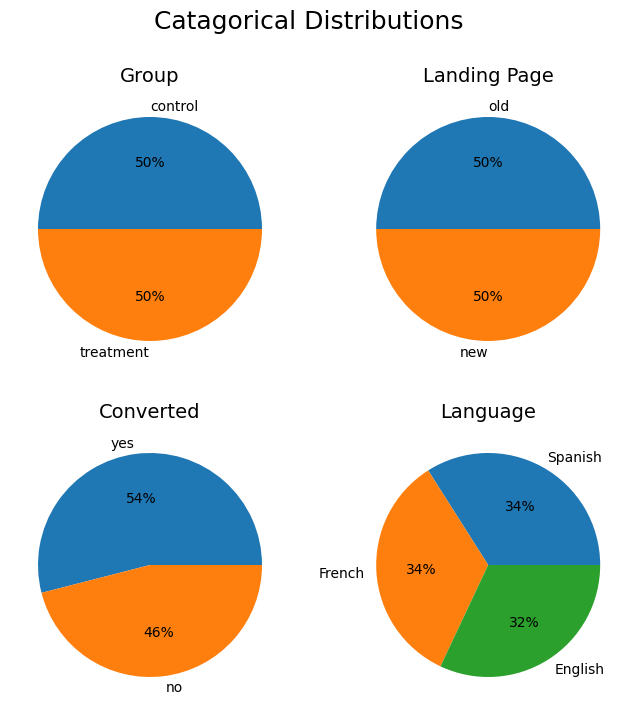

In [69]:
#Create labels and values for pie chart
group_labels = df.group.value_counts().keys()
group_counts = df.group.value_counts().values
page_labels = df.landing_page.value_counts().keys()
page_counts = df.landing_page.value_counts().values
converted_labels = df.converted.value_counts().keys()
converted_counts = df.converted.value_counts().values
language_labels = df.language_preferred.value_counts().keys()
language_counts = df.language_preferred.value_counts().values

pie_fig, pie_ax = plt.subplots(2,2)
pie_fig.set_figwidth(8)
pie_fig.set_figheight(8)
pie_fig.suptitle('Catagorical Distributions', fontsize = 18)


pie_ax[0,0].pie(group_counts, labels = group_labels, autopct = '%1.0f%%')
pie_ax[0,0].set_title('Group', fontsize = 14)

pie_ax[0,1].pie(page_counts, labels = page_labels, autopct = '%1.0f%%')
pie_ax[0,1].set_title('Landing Page', fontsize = 14)

pie_ax[1,0].pie(converted_counts, labels = converted_labels, autopct = '%1.0f%%')
pie_ax[1,0].set_title('Converted', fontsize = 14)

pie_ax[1,1].pie(language_counts, labels = language_labels, autopct = '%1.0f%%')
pie_ax[1,1].set_title('Language', fontsize = 14);

**Observations**

---

From the charts above, we can see that `group`, `landng_page` and `language_preferred` are all evenly distributed.

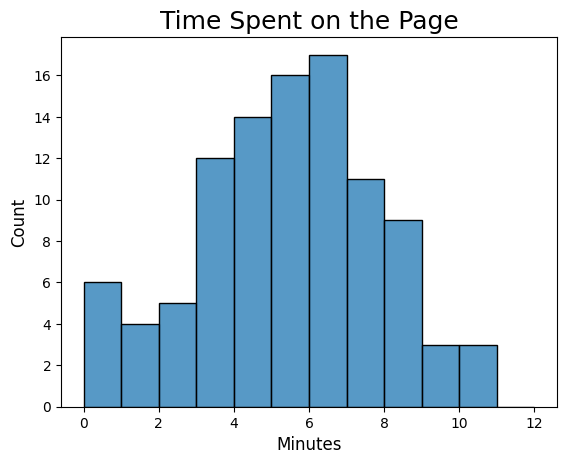

In [70]:
sns.histplot(data = df, x = 'time_spent_on_the_page', binrange = (0, 12), binwidth = 1)
plt.title('Time Spent on the Page', fontsize = 18)
plt.xlabel('Minutes', fontsize = 12)
plt.ylabel('Count', fontsize = 12);

**Observations**

---

From earlier we know the mean value for `time_spent_on_the_page` is 5.38.  In the graph above, it looks like `time_spent_on_the_page` has a normal distribution.  We can test this with a Shapiro-Wilk's Test.

#### Shapiro-Wilk's Test for Normality

**Hypotheses**

---
$H_0:$ `time_spent_on_the_page` follows has a normal distribution

$H_A:$ `time_spent_on_the_page` does not have a normal distribution

In [71]:
w, p_value = stats.shapiro(df.time_spent_on_the_page)
print(f"The p-value is {round(p_value, 8)}")

The p-value is 0.56431931


Since the p-value is larger than 0.05, the test tells us that sample distribution for `time_spent_on_the_page` is approximately normal.

### Bivariate Analysis

In [72]:
# This is ment to confirm which group used which landing page, and that everyone in the group used the same landing page.
control_count = len(df.loc[(df.group == 'control') & (df.landing_page == 'old')])
treatment_count = len(df.loc[(df.group == 'treatment') & (df.landing_page == 'new')])

print(f"There are {control_count} many particpants in the control group who used the old landing page.")
print(f"There are {treatment_count} many particpants in the treatment group who used the new landing page.")

There are 50 many particpants in the control group who used the old landing page.
There are 50 many particpants in the treatment group who used the new landing page.


This confirms that everyone in the control group used the old landing page and that everyone in the treatment group used the new landing page.  As such `group` and `landing_page` are duplicate columns and we only need one of them.

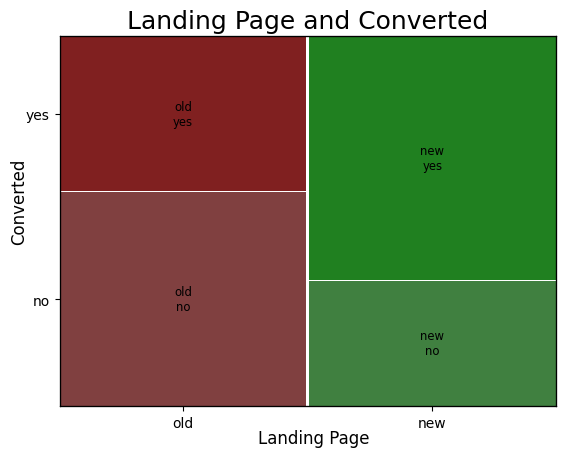

In [73]:
#Creates Mosaic Plot comparing landing_page and converted
mosaic(df, ['landing_page', 'converted'], axes_label = True)

#Adds Title
plt.title('Landing Page and Converted', fontsize = 18)

#Manualy adds x and y label (xlabel() and ylabel() were not working)
plt.text(.4,-.1, 'Landing Page', fontsize = 12)
plt.text(-.1,.45, 'Converted', fontsize = 12, rotation = 90);

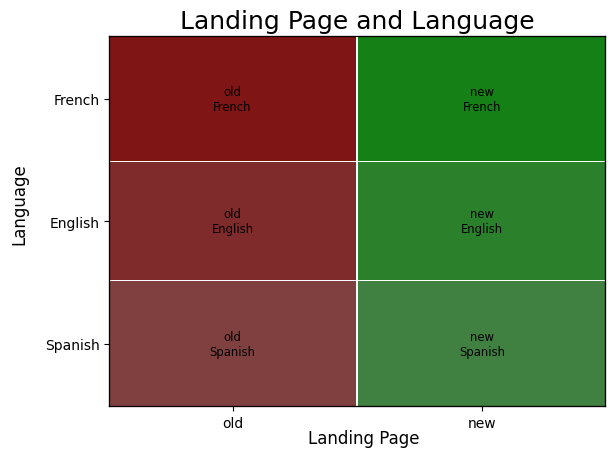

In [74]:
#Creates Mosaic Plot of landing_page and language_preferred
mosaic(df, ['landing_page', 'language_preferred'], axes_label = True)

#Adds Title
plt.title('Landing Page and Language', fontsize = 18)

#Manualy adds x and y label (xlabel() and ylabel() were not working)
plt.text(.4,-.1, 'Landing Page', fontsize = 12)
plt.text(-.2,.45, 'Language', fontsize = 12, rotation = 90);

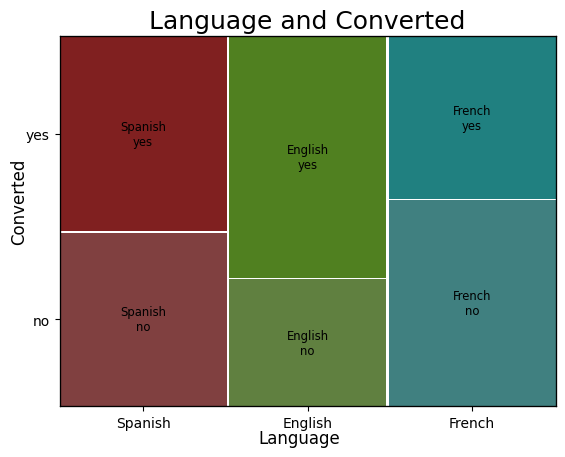

In [75]:
#Creates Mosaic Plot
mosaic(df, ['language_preferred', 'converted'], axes_label = True)

#Adds Title
plt.title('Language and Converted', fontsize = 18)

#Manualy adds x and y label (xlabel() and ylabel() were not working)
plt.text(.4,-.1, 'Language', fontsize = 12)
plt.text(-.1,.45, 'Converted', fontsize = 12, rotation = 90);

**Observations**

---
* A higher percentage of people were converted by the new landing page, then the old landing page.
* It looks like preferred language was controled for inside of each group.  
* English users had the highest percentage of converted while French users had the smallest percentage.

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

In [76]:
df.groupby('landing_page')['time_spent_on_the_page'].describe()

,count,mean,std,min,25%,50%,75%,max
landing_page,,,,,,,,
new,50.0,6.2232,1.817031,1.65,5.175,6.105,7.1600,10.71
old,50.0,4.5324,2.581975,0.19,2.720,4.380,6.4425,10.30


Text(0, 0.5, 'Time on Page')

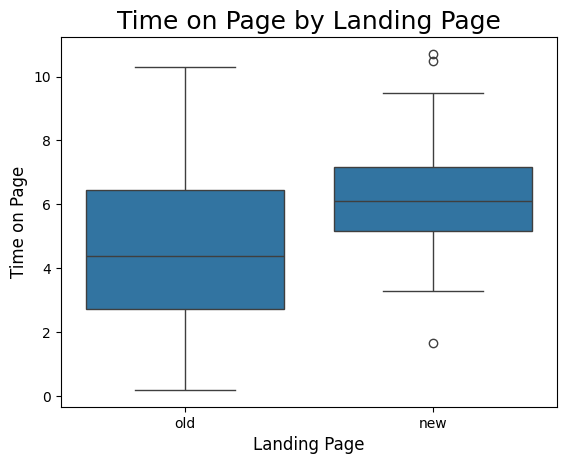

In [77]:
sns.boxplot(data = df, x = 'landing_page', y = 'time_spent_on_the_page')

plt.title('Time on Page by Landing Page', fontsize = 18)

plt.xlabel('Landing Page', fontsize = 12)
plt.ylabel('Time on Page', fontsize = 12)

**Observation**

---
In our sample, the users on the new landing page spent on average 1.69 minutes longer on the page than the users on the old landing page. There was also less variation in the time that users were on the new landing page as compared to the old landing page.

We can run a 2 Sample T-test to see if this result is statistically significant.

### Step 1: Define the null and alternate hypotheses

**Statistics**

---
Let $\mu_{new}$ be the average time users spent on the new landing page.

Let $\mu_{old}$ be the average time users spent on the old landing page.

**Hypothesis**

---

$H_0: \mu_{new} = \mu_{old}$.

$H_A: \mu_{new} > \mu_{old}$.

### Step 2: Collect and prepare data (Was step 4)

I changed the order of the steps because to be able to test if the variances are different, I needed to prepare the data.

In [78]:
#I need to be able to grab the data from the new landing page seprately from th
df_new = df.loc[df.landing_page == 'new']
df_old = df.loc[df.landing_page == 'old']

### Step 3: Select Appropriate test (Was step 2)

We are going to use a 2 sample T-test, because we are comparing two different quantitative variables and do not know the populations standard deviation.

**T-test Assumptions**

---
* The Data is Continuous - Yes
* Independent populations - Yes, the usage of one user does not affect a another user.
* Random Sampling - Yes, as stated in the description.
* Data in Each are Normally Distributed - We know that the `time_spent_on_the_page` is normally distributed, but in this test we are splitting that variable into two different groups based on `landing_page`.  Therefore, we will need to check if each group has a normal distribution.
* Unequal Population Variance - We know from the box plot above, that the varance did not look equal.  We will use a F-test for Equality of Variance to test this.

---


#### Shapiro-Wilk's Test for Normality in Each Group

**Old Landing Page**

Hypotheses
* $H_0:$ `time_spent_on_the_page` for users on the old landing page is normally distributed.
* $H_A:$ `time_spent_on_the_page` for user on the old landing page is not normally distributed.

In [79]:
w, p_value = stats.shapiro(df.time_spent_on_the_page[df.landing_page == 'old'])
print(f"The p-value is {round(p_value, 8)}")

The p-value is 0.45611921


**New Landing Page**

Hypotheses
* $H_0:$ `time_spent_on_the_page` for users on the new landing page is normally distributed.
* $H_A:$  `time_spent_on_the_page` for user on the old landing page is not normally distributed.

In [80]:
w, p_value = stats.shapiro(df.time_spent_on_the_page[df.landing_page == 'new'])
print(f"The p-value is {round(p_value, 8)}")

The p-value is 0.80400163


Since both p-values were above 0.05, this means that the assumption is met.

#### F-test for Equality of Varances



**Statistics**
> * $\sigma_{new}$ is the standard deviation of time spent on the new landing page.
> * $\sigma_{old}$ is the standard deviation of the time spent on the old landing page.

**Hypothesis**
> * Null Hypothesis: $\sigma^2_{new} = \sigma^2_{old}$
> * Alternative Hypothesis: $\sigma^2_{new} \neq \sigma^2_{old}$



In [81]:
p_value = f_test(df_new.time_spent_on_the_page, df_old.time_spent_on_the_page)
p_value = round(p_value, 8)

print(f"The p-value is {p_value}")

The p-value is 0.0154112


Since the p-value is less than the significance level, we can reject the null hypothesis and there is enough evidance to show that the variances of time spent on the new and old page are different.  Therefore, our assumptions are met.

### Step 4: Decide the significance level (Was step 3)

As stated in the description, we will use a significance level of 5%

### Step 5: Calculate the p-value

In [82]:
test_stat, p_value = stats.ttest_ind(df_new.time_spent_on_the_page, df_old.time_spent_on_the_page, equal_var = False, alternative = 'greater')
print('The p-value is: ', p_value)

The p-value is:  0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

We can see that the p-value is smaller than 0.05, and so we are going to reject the null hypothesis.  

### Step 7:  Draw inference

Since we rejected the null hypothesis.  This means there is enough evidance to claim users spend more time on the new landing page.

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

In [83]:
page_counts_table = df.groupby('landing_page')['converted'].value_counts()
print(page_counts_table)

landing_page  converted
new           yes          33
              no           17
old           no           29
              yes          21
Name: converted, dtype: int64


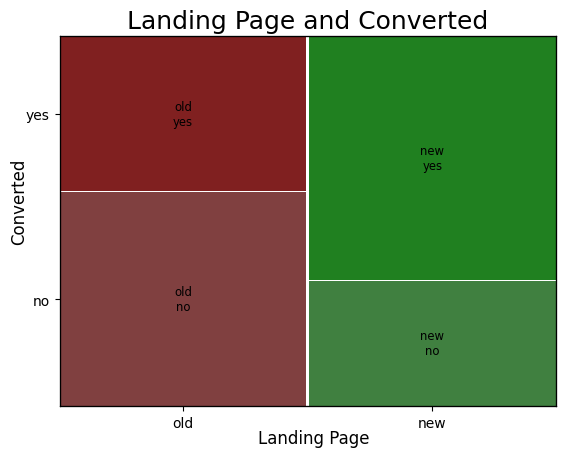

In [84]:
#Creates Mosaic Plot comparing landing_page and converted
mosaic(df, ['landing_page', 'converted'], axes_label = True)

#Adds Title
plt.title('Landing Page and Converted', fontsize = 18)

#Manualy adds x and y label (xlabel() and ylabel() were not working)
plt.text(.4,-.1, 'Landing Page', fontsize = 12)
plt.text(-.1,.45, 'Converted', fontsize = 12, rotation = 90);



**Statistics**

---

Let $p_{new}$ be the conversion rate of the new landing page.

Let $p_{old}$ be the conversion rate of the old landing page.

**Hypotheses**

---

$H_0: p_{new} = p_{old}$

$H_A: p_{new}>p_{old}$

**Select Appropriate Test**

---

We will use a 2-sample Z-test because we are comparing two propotions.

**Are the Z-test Assumptions Satisfied**

*   Binomally- Yes
*   Random Sampling from the Population - Yes, as statedin the description.
*   Normal Sampling Distribution - Yes, each catagory has at least 10 users.

We will us a siginficance level of 5% as asked for in the description.

**Set-up the Data**

---

In [85]:
converted_counts = [page_counts_table['new']['yes'], page_counts_table['old']['yes']]
page_counts = [page_counts_table['new'].sum(), page_counts_table['old'].sum()]

**Calculating the p-value**

---

In [86]:
test_stat, p_value = proportions_ztest(converted_counts, page_counts)
print('The p-value is ' + str(p_value))

The p-value is 0.016052616408112556


**Conclusion**

---

Since the p-value of 0.016 is less than the significance level of 0.05, we reject the null hypothesis.  Therefore, we have enough evidence to claim that the conversion rate of the new page is greater than the old page.

## 3. Is the conversion and preferred language are independent or related?

In [87]:
language_converted_counts = df.groupby('language_preferred')['converted'].value_counts()
language_converted_counts

language_preferred  converted
English             yes          21
                    no           11
French              no           19
                    yes          15
Spanish             yes          18
                    no           16
Name: converted, dtype: int64

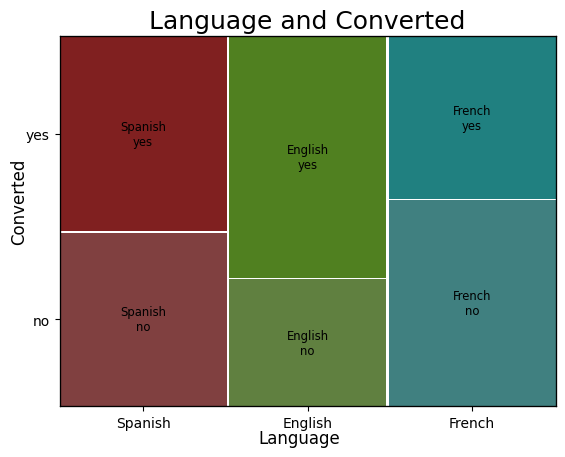

In [88]:
#Creates Mosaic Plot
mosaic(df, ['language_preferred', 'converted'], axes_label = True)

#Adds Title
plt.title('Language and Converted', fontsize = 18)

#Manualy adds x and y label (xlabel() and ylabel() were not working)
plt.text(.4,-.1, 'Language', fontsize = 12)
plt.text(-.1,.45, 'Converted', fontsize = 12, rotation = 90);

**Hypothesis**

---

> * Null Hypothesis: converted and language_preferred are independant
> * Alternative Hypothesis: converted depends on preferred language

**Select Appropreate Test**

---

We will use the Chi-Square Test for Independence

**Assumptions**
* Categorical variables - Yes
* Expected value is at least 5 - Yes, the number of observations in each level is greater than 5.
* Random Sampling from the population - Yes, as stated in the description

**Significance Level**

---
We will use a 5% significance level as stated in the description.

In [89]:
#Setting up the Data
two_way_table = pd.DataFrame({'language_preferred': df.language_preferred.unique()})

yes = []
no = []

for row in two_way_table.language_preferred:
  yes.append(language_converted_counts[row]['yes'])
  no.append(language_converted_counts[row]['no'])

two_way_table['yes'] = yes
two_way_table['no'] = no

two_way_table

,language_preferred,yes,no
0,Spanish,18,16
1,English,21,11
2,French,15,19


In [90]:
chi, p_value, dof, expected = stats.chi2_contingency(two_way_table.drop('language_preferred', axis = 1))

print(f'The p-value is {round(p_value, 8)}')

The p-value is 0.21298887


**Conclusion**

---

Since the p-value of 0.213 is bigger than the significance level of 0.05, we fail to reject the null hypothesis.  In other words, we do not have enough evidence to claim the preferred language and converted are dependant.

## 4. Is the time spent on the new page same for the different language users?

In [103]:
new_df = df.loc[df.landing_page == 'new']
new_df.groupby('language_preferred').describe()

time_spent_on_the_page                                    \
                                    count      mean       std   min     25%   
language_preferred                                                            
English                              16.0  6.663750  1.984150  3.65  5.3275   
French                               17.0  6.196471  1.933394  3.30  5.2500   
Spanish                              17.0  5.835294  1.525656  1.65  5.1500   

                                          
                      50%     75%    max  
language_preferred                        
English             6.865  7.7125  10.50  
French              5.420  7.2700  10.71  
Spanish             6.200  6.7000   8.08

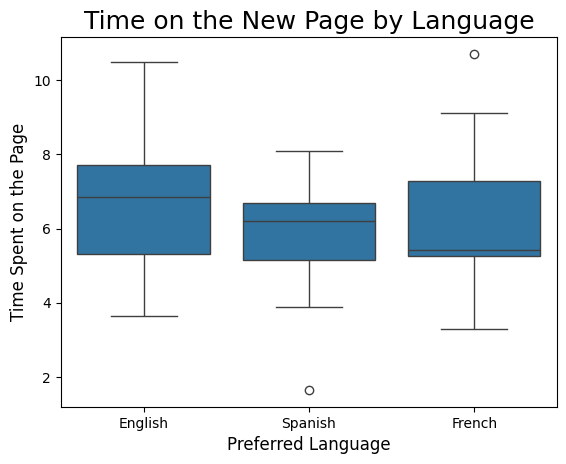

In [112]:
sns.boxplot(data = new_df, x = 'language_preferred', y = 'time_spent_on_the_page')

plt.title('Time on the New Page by Language', fontsize = 18)
plt.xlabel('Preferred Language', fontsize = 12)
plt.ylabel('Time Spent on the Page', fontsize = 12);

**Statistics**

---

* Let $\mu_S$ be the mean time on the new page for people who prefer spanish.
* Let $\mu_E$ be the mean time on the new page for people who prefer english.
* Let $\mu_F$ be teh mean time on the new page for people who prefer french.

**Hypothesis**

---

* $H_0: \mu_S = \mu_E = \mu_F$.
* $H_A:$ At least one mean is different from the rest.

**Assumptions**

---

* Each Sample is drawn from a normal distribution: We will test each distribution with the Shapiro-Wilk's Test for Normality.
* Equality of Variances: We will test the variances with a Levene Test.

####Shapiro-Wilk's Test for Normality in Each Group

**English Users**

Hypotheses
> * $H_0:$ `time_spent_on_the_page` for English users is normally distributed
> * $H_A:$ `time_spent_on_the_page` for English users is not normally distributed



In [105]:
w, p_value = stats.shapiro(new_df.time_spent_on_the_page[df.language_preferred == 'English'])
print(f"The p-value is {round(p_value, 8)}")

The p-value is 0.88634515


**Spanish Users**

Hypothesis
> * $H_0:$ `time_spent_on_the_page` for Spanish users is normally distributed
> * $H_A:$ `time_spent_on_the_page` for Spanish users is not normally distributed

In [106]:
w, p_value = stats.shapiro(new_df.time_spent_on_the_page[df.language_preferred == 'Spanish'])
print(f"The p-value is {round(p_value, 8)}")

The p-value is 0.09006833


**French Users**

Hypothesis
> * $H_0:$ `time_spent_on_the_page` for French users is normally distributed
> * $H_A:$ `time_spent_on_the_page` for French users is not normally distributed

In [107]:
w, p_value = stats.shapiro(new_df.time_spent_on_the_page[df.language_preferred == 'French'])
print(f"The p-value is {round(p_value, 8)}")

The p-value is 0.32136881


Since all three of the p-values are greater than 0.05, we can assume that the assumption is met.

#### Levene Test for Equality of Variance

Hypotheses

> $H_0:$ All three groups have the same variance

> $H_A:$ At least one group has a different variance.




In [108]:
statistic, p_value = stats.levene(new_df.time_spent_on_the_page[df.language_preferred == 'Spanish'],
                                  new_df.time_spent_on_the_page[df.language_preferred == 'English'],
                                  new_df.time_spent_on_the_page[df.language_preferred == 'French'])

print(f"The p-value is {round(p_value, 8)}")

The p-value is 0.46711358


Since the p_value is greater than 0.05, the variances are not significantly different and the assumption is met.

In [109]:
test_stat, p_value, = stats.f_oneway(new_df.time_spent_on_the_page[df.language_preferred == 'Spanish'],
                                  new_df.time_spent_on_the_page[df.language_preferred == 'English'],
                                  new_df.time_spent_on_the_page[df.language_preferred == 'French'])

print(f"The p-value is {p_value}")

The p-value is 0.43204138694325955


Since our p-value of 0.432 is greater than 0.05 we fail to reject the null hypothesis and there is not enough evidance to claim that `time_spent_on_the_page` for the new page differs between the different language groups.

#### What if the variances were different?

I found online that you can use a `welch_anova` test when the variances are different. Below is the code for a test that returns a p-value of 0.885.

In [110]:
pg.welch_anova( dv = 'time_spent_on_the_page', between = 'language_preferred', data = new_df)

,Source,ddof1,ddof2,F,p-unc,np2
0,language_preferred,2,30.598374,0.883675,0.423544,0.035082


## Conclusion and Business Recommendations

**Results**

 ---

1. Do the users spend more time on the new landing page than on the existing landing page?
> Yes, when we ran the 2 sample T-test we got a p-value of 0.000139 which was small enough to make this claim.

2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
> Yes, when we ran the 2 sample Z-test for Proportions, we got a p-value of 0.0160526 which was small enough to make this claim.

3. Does the converted status depend on the preferred language?
> There is not enough evidence to claim that `converted` is dependant on `language_preferred`.  We ran a Chi-Squared Test for Indepenance and got a p-value of 0.213.

4. Is the time spent on the new page the same for the different language users?
> There is not enough evidence to claim that people from different language groups spend differnt amount of time on the new page.



 **Recommendations**

 ---
* The new landing page was better at getting customers to stay the page longer and more likely to convert users.  This suggest that the new page is better than the old landing page.  I would suggest switching to the new landing page.

* There was not enough data to claim that converted status was dependant on the preferred language, but the graph suggests that it might be.  If this is an area of interest the company should run this test again with a larger sample size and they would likly get the evidance needed.




In [113]:
!jupyter nbconvert --to html ENews_Express_Learner_Notebook5D.ipynb

[NbConvertApp] Converting notebook ENews_Express_Learner_Notebook5D.ipynb to html
[NbConvertApp] Writing 1037929 bytes to ENews_Express_Learner_Notebook5D.html


___